# [Topic Modeling](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)

In [1]:

from pprint import pprint
import numpy as np
np.random.seed(2018)
import nltk

# reload only imported modules before run
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

'''
pantree bank tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
standford source: https://nlp.stanford.edu/software/CRF-NER.shtml
standford online text tree generater: http://nlp.stanford.edu:8080/parser/index.jsp
'''

'\npantree bank tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html\nstandford source: https://nlp.stanford.edu/software/CRF-NER.shtml\nstandford online text tree generater: http://nlp.stanford.edu:8080/parser/index.jsp\n'

### constants

In [2]:
start_date = '01-11-2018' #  09-Sep-2018 
end_date = '30-12-2018' # 01-Oct-2018

### We will perform the following steps:

#### 1. Tokenization: 
Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.

In [3]:
# def tokenize(text):
#     return gensim.utils.simple_preprocess(text)

#### 2. Remove small words:
Words that have fewer than 3 characters are removed.

In [4]:
# def isShortWord(token):
#     return len(token) < 3

#### 3. Remove stopwords:
All stopwords are removed.

In [5]:
# def isStopWord(token):
#     return token in gensim.parsing.preprocessing.STOPWORDS

#### 4. lemmatized +  Stemming:
Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.

Words are stemmed — words are reduced to their root form.

In [6]:
# from nltk.corpus import wordnet as wn
# from nltk import pos_tag, word_tokenize
# from nltk.stem.porter import *
# from textblob import TextBlob


# def lemmatize_stemming(token):
#     stemmer = PorterStemmer() #gensim.parsing.stem_text(tokenize) #
#     for word, tag in pos_tag(word_tokenize(token)):
#         wntag = tag[0].lower()
#         wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
#         lemma = WordNetLemmatizer().lemmatize(word, wntag) if wntag else word
#         return TextBlob(lemma).words[0].singularize()
#     return ''

#### 5. Replace Emojis:

In [7]:
# ## get emoji characters file path
# def getEmojis():
#     from dataSource import getEmojis
#     comments_file_path = getDataSourcePathFor(emoji_path)
#     return getEmojis(comments_file_path)#.head()

In [8]:
# def hasEmojicon(token):
    
# def replaceEmojicons(token, emojies):
#     pass
    

## Data Source

In [9]:
# def getNounList(sentence='', tokens = []):
#     from nltk import word_tokenize, pos_tag
#     if len(tokens) > 0:    
#         nouns = [token for token, pos in pos_tag(tokens) if pos.startswith('NN')]
#         return nouns
#     else:
#         nouns = [token for token, pos in pos_tag(word_tokenize(sentence)) if pos.startswith('NN')]
#         return nouns

In [10]:
# text = 'I Have done reviewing, Will be seeing by them'
# print(preprocess(text))

In [11]:
# key is file storage path
# def getDataSourcePathFor(keyForFilePath):
#     import json
#     import os
    
#     config_file_path = os.environ[virtual_env] + '/config.json'

#     with open(config_file_path) as f:
#         config = json.load(f)
#         if keyForFilePath in config:# ['comments_path', 'output_path']
#             return config[keyForFilePath] 
#     return None

In [12]:
# ## get list of comments from stored input csv file
# import dataSource 

# def getListOfComments():
#     ### This is to get csv rows between given dates
#     comments_file_path = getDataSourcePathFor(comments_path)
#     commentsList = getComments(comments_file_path, start_date, end_date) #['comments'] 
#     commentsList = commentsList.sort_values(by='ratings', ascending=True)['comments'] 
#     print('Total number of comments: %s between %s and %s' % (len(commentsList), start_date, end_date))
#     return commentsList

### Text processing

In [13]:
# import re

# def filterWord(token):
#     if not (isStopWord(token) or isShortWord(token)):
#         lemmaWord = lemmatize_stemming(token)
#         if not isShortWord(lemmaWord):
#             return ("".join(re.findall("[a-zA-Z]+", lemmaWord)).lower())
#     return None 
    
# def filters(sentence):
# #     print('..given comments:', sentence)
#     result = []
#     #nouns = getNounList(sentence) # fetch only Nouns
#     for token in tokenize(sentence):#nouns: ###tokenize(text):
#         result.append(filterWord(token))
#     return result

# def filterWords(tokens):
#     return list(filter(lambda token: filterWord(token), tokens))

In [14]:
# def preprocessCommentDocument(document):
#     return list(map(lambda sentence: filters(sentence), document))

### Word Cloud

In [15]:
from wordCloud import showWordCloud
def showCloud(topicCollection):
    showWordCloud(topicCollection) 

### Bag of Words on the Data set

In [16]:
def bow(processed_docs):
    dictionary = gensim.corpora.Dictionary(processed_docs)
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
    return bow_corpus

### Sentiment

In [17]:
from getSentiment import getSentiment

def getSentFromCommentList(commentList):
    sentimentList = []
    for sentence in commentList:
        sentiment = getSentiment(sentence)
        sentimentList.append(sentiment)
    return sentimentList


def isNegative(sentiment):
    return sentiment > 0.5


def tokenDictWithPosNegSentiment(sentimentList, document):
    sentDict = {}
    size = range(len(document))
    
    for i in size:
        for token in document[i]:
            v = (0, 0, 0) # (neg, pos, freq)
            if token in sentDict:
                v = sentDict[token]
                
            if isNegative(sentimentList[i]):
                v = (v[0]+1, v[1], v[2]+1)
            else:
                v = (v[0], v[1]+1, v[2]+1)
            sentDict[token] = v
    sentDict.pop('', None)
    return sentDict 

### Main()

In [18]:
import SDataSource
import SConstants
from SWordList import SWordList
from sUtility import SUtility
from sPreprocessor import SPreprocessor


In [78]:
sutility = SUtility()
spreprocessor = SPreprocessor()

# SPreprocessor.resolveDependancy(trieCommon)
dateBetween = [start_date, end_date]
commentsDocument = SDataSource.getListOfComments(dateBetween)#.head(1000)
print('filtered comments: ', len(commentsDocument))
# document preprocessing, cleaning, filtering, replacement, spliting into multiple senetnces from one
processed_doc = []
for sentence in commentsDocument:
    for each in spreprocessor.docCleaning(sentence):
        processed_doc.append(each)


Total number of comments: 972 between 01-11-2018 and 30-12-2018
filtered comments:  320


In [79]:
def makeDict(sentence):
    t = spreprocessor.parseToTokens(trieTopic, sentence)
    r = spreprocessor.parseToTokens(trieNReason, sentence)
#     print(sentence)
#     print('topic is:', t)
#     print('reasons are:', r)
#     print()
    sutility.dump(t, r)

In [80]:
wordList_file = SDataSource.getDataSourcePathFor(SConstants.wordFile_path)
trieCommon = SWordList(wordList_file)

topic_file = SDataSource.getDataSourcePathFor(SConstants.topic_path)
trieTopic = SWordList(topic_file)

n_reason_file = SDataSource.getDataSourcePathFor(SConstants.n_reason_path)
trieNReason = SWordList(n_reason_file)

..SWordList constructor called 
..SWordList constructor called 
..SWordList constructor called 


In [81]:
l = ['crashing', 'changes', 'upi', 'biometric']
print(spreprocessor.filterWords(l))
    

['crash', 'chang', 'upi', 'biometr']


In [82]:
for each in processed_doc:
    makeDict(each)

topic: ('app', 190)
reasons [('open', 14), ('not working', 10), ('crash', 6), ('every time', 5), ('bad', 4), ('chang', 4), ('popup', 4), ('reset', 3), ('frustrat', 3), ('problem', 2), ('stuck', 2), ('unstabl', 2), ('something went wrong', 2), ('suck', 2), ('forc', 1), ('reflect', 1), ('screen', 1), ('servic', 1), ('buggi', 1), ('fix it', 1), ('deposit', 1), ('broke', 1), ('transfer', 1), ('worst experience', 1), ('incorrect', 1), ('stop', 1)]


/home/nawaz/.virtualenvs/AWSComp/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


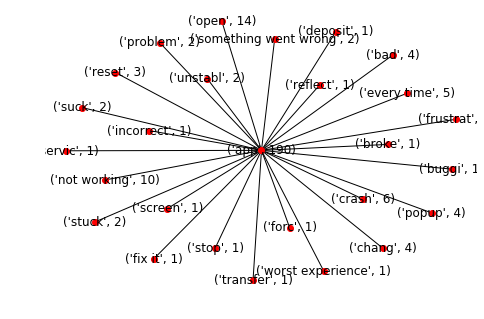

In [83]:
from sNetworkx import SNetworkx
snetworkx = SNetworkx()
t = sutility.getFamousTopics()[0]
r = sutility.getReasonDict()[0]
print('topic:', t)
print('reasons', r[1])
snetworkx.inputData(t, r[1])
snetworkx.show()

In [84]:
sutility.showTopicCounts()
print('---------------------------------')
sutility.showReasonDict()

[('app', 190), ('account', 77), ('login', 65), ('debit card', 45), ('updat', 42), ('upi', 32), ('version', 15), ('customer care', 14), ('atm', 8), ('kyc', 7), ('customer service', 7), ('look', 5), ('balanc', 4), ('biometr', 4), ('signup', 3), ('ifsc', 2), ('debit cards', 2), ('charg', 2), ('speed', 2), (None, 2), ('internet', 2), ('offer', 1), ('postal code', 1), ('deals and offers', 1), ('back option', 1), ('another bank', 1), ('international transactions', 1)]
---------------------------------
app
[('open', 14), ('not working', 10), ('crash', 6), ('every time', 5), ('bad', 4), ('chang', 4), ('popup', 4), ('reset', 3), ('frustrat', 3), ('problem', 2), ('stuck', 2), ('unstabl', 2), ('something went wrong', 2), ('suck', 2), ('forc', 1), ('reflect', 1), ('screen', 1), ('servic', 1), ('buggi', 1), ('fix it', 1), ('deposit', 1), ('broke', 1), ('transfer', 1), ('worst experience', 1), ('incorrect', 1), ('stop', 1)]

account
[('open', 18), ('transfer', 4), ('servic', 4), ('problem', 3), ('ba

In [85]:
sutility.showTopicCounts()
# sentList = commentsDocument.map(getSentiment)

[('app', 190), ('account', 77), ('login', 65), ('debit card', 45), ('updat', 42), ('upi', 32), ('version', 15), ('customer care', 14), ('atm', 8), ('kyc', 7), ('customer service', 7), ('look', 5), ('balanc', 4), ('biometr', 4), ('signup', 3), ('ifsc', 2), ('debit cards', 2), ('charg', 2), ('speed', 2), (None, 2), ('internet', 2), ('offer', 1), ('postal code', 1), ('deals and offers', 1), ('back option', 1), ('another bank', 1), ('international transactions', 1)]


In [ ]:
# l = list(commentsDocument)
# p = list(processed_doc)

# length = len(l)

# for i in range(length):
#     print(l[i])
#     print(p[i])
#     print()

In [ ]:
dump = list(zip(commentsDocument, processed_doc))
length = len(dump)
for i in range(length):
    print(dump[i][0])
    print(dump[i][1])
    print(sentList.iloc[i])
    print()

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_doc)
# dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_doc]

In [ ]:
from gensim import corpora, models
corpus_tfidf = models.TfidfModel(bow_corpus)[bow_corpus]

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [ ]:
# indexFor = 5
# print('..COMMENT :', commentsDocument[indexFor])
# print('\n..CORPOS :', processed_doc[indexFor])
# # print('\n..BOW:', bow_corpus[indexFor])
# for index, score in sorted(lda_model_tfidf[bow_corpus[indexFor]], key=lambda tup: -1*tup[1]):
#     print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))

In [ ]:
topics = lda_model_tfidf.print_topics(num_words=4)
for topic in topics:
    print(topic)

In [ ]:
# print(processed_doc.values)

In [ ]:
l = tokenDictWithPosNegSentiment(list(sentList), list(processed_doc))


In [ ]:
# print(sortedMostPos(l))

In [ ]:
from showBarGraph import *
# show positive bar graph
showBarCharForSentiment(sortedMostPos(l), pos=True)

In [ ]:
# print(sortedMostNeg(l))
# show positive bar graph
showBarCharForSentiment(sortedMostNeg(l), pos=False)

In [ ]:
showPiChart(sortedMostFreq(l))

In [ ]:
# showTempBarChart()